In [1]:
from model import *
from utils import *

# Variables
BATCH_SIZE = 256
LR = 1e-3
MAX_EPOCHS = 50

### Check images from dataset

In [ ]:
multiSet = MultiSet('pokemon')
dataLoader = Utils.DataLoader(dataset=multiSet, shuffle=True, batch_size=1)

for i, data in enumerate(dataLoader):
    if i in range(5):
        plt.imshow(data[0,:,:,:].squeeze().numpy())
        plt.show()

### Notebook training

In [ ]:
# load checkpoint by adding name
try:
    net, epoch, losses, bces, kls, optimizer, scheduler = load_checkpoint("./checkpoints/[cp_name]", LR)
except:
    net = Net() # Initialize model
    if torch.cuda.is_available():
        if torch.cuda.device_count() > 1:
            net = torch.nn.DataParallel(net)
        net = net.cuda() 
    epoch = 0
    losses = []
    bces = []
    kls = []
    optimizer = optim.Adam(net.parameters(), lr=LR, amsgrad=True)
    scheduler = SGDRScheduler(optimizer, min_lr=1e-5, max_lr=LR, cycle_length=500, current_step=0)
    print("Starting new training")

# Load dataloader
gen_data_list()
multiSet = MultiSet('pokemon')
dataloader = Utils.DataLoader(dataset=multiSet, shuffle=True, batch_size=BATCH_SIZE)

# Training
train_losses, bces, kls = train(net, optimizer, scheduler,dataloader, epoch, "POKEVAE", losses, bces, kls, MAX_EPOCHS)

# Loss plots
plt.figure(figsize=(10,5))
plt.plot(train_losses)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(bces)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(kls)
plt.show()

### View data after training

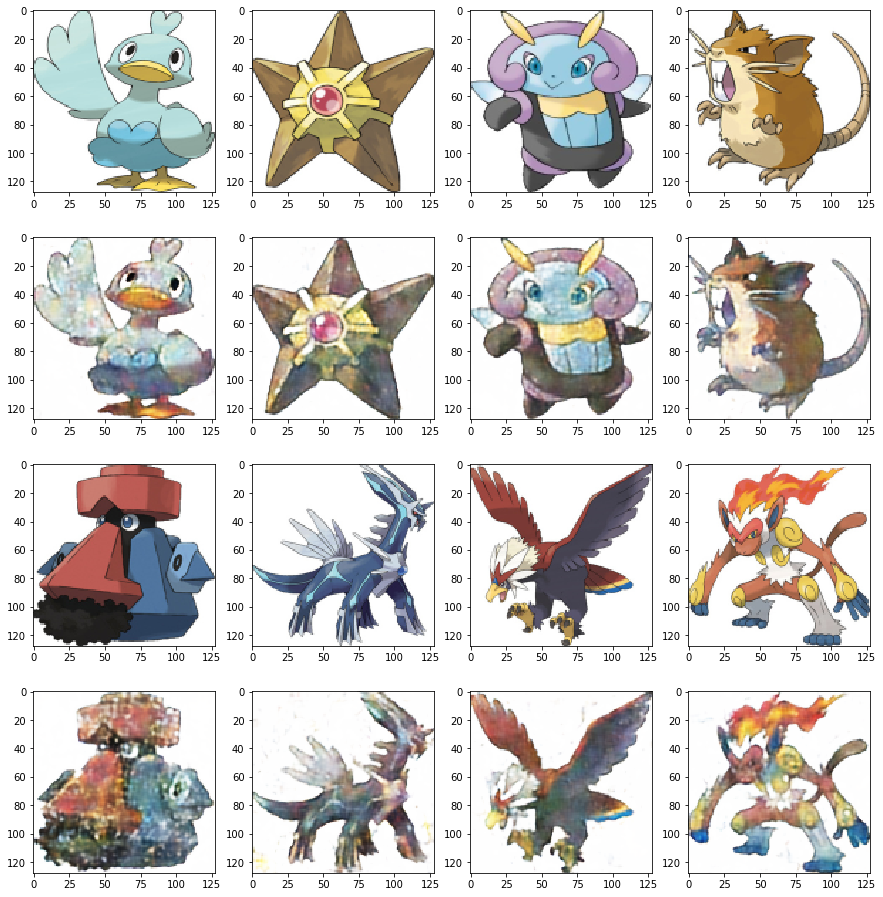

In [11]:
# Load checkpoint by changing name
try:
    net, epoch, losses, bces, kls, optimizer, scheduler = load_checkpoint("./checkpoints/VAE_epoch_014990.pth", LR)
except:
    raise

# Load dataloader
gen_data_list()
multiSet = MultiSet('pokemon')
dataLoader = Utils.DataLoader(dataset=multiSet, shuffle=True, batch_size=BATCH_SIZE)

# Create multi-plot
for images in dataLoader:
    clear_output(wait=True)
    multi_plot(images, net)
    break

### Losses

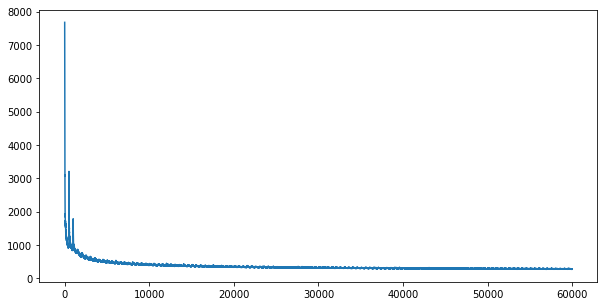

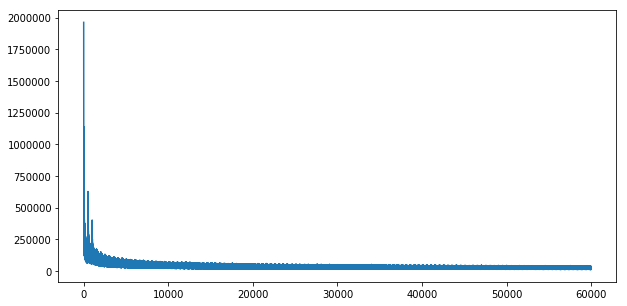

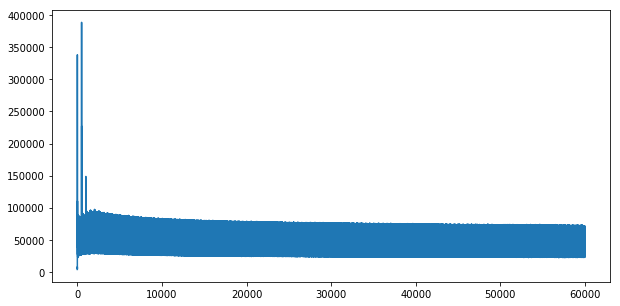

In [4]:
# Loss plots
plt.figure(figsize=(10,5))
plt.plot(losses)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(bces)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(kls)
plt.show()

### Sweep through latent dimensions [NEEDS FIXING]

In [12]:
try:
    net, epoch, losses, bces, kls, optimizer, scheduler = load_checkpoint("./checkpoints/VAE_epoch_014990.pth", LR)
except:
    raise

gen_data_list()
multiSet = MultiSet('pokemon')
dataLoader = Utils.DataLoader(dataset=multiSet, shuffle=True, batch_size=1)

for images in dataLoader:
    sweep(net, images, 99, -15, 15, 1)
    break

Loaded checkpoint: ./checkpoints/VAE_epoch_014990.pth
Pokemon image list available


/home/ubuntu/anaconda3/envs/pytorch_source/lib/python3.6/site-packages/imageio/core/util.py:78: UserWarning: Lossy conversion from float32 to uint8, range [0, 1]
  dtype_str, out_type.__name__))
